In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from datetime import datetime

In [46]:
# load data
data = np.load("/work/ab0995/a270284/storm_track_slp_Africa_ERA5.npz", allow_pickle=True)
storms = data["storms"]

In [47]:
storms[-3:]

array([{'lon': array([12.89193251, 12.02174854, 13.27777409]), 'lat': array([42.50672925, 43.18478982, 42.02778526]), 'amp': array([101071.375 , 101240.25  , 101397.4375]), 'type': 'anticyclonic', 'year': array([2020, 2020, 2020], dtype=int32), 'month': array([12, 12, 12], dtype=int32), 'day': array([31, 31, 31], dtype=int32), 'hour': array([ 6, 12, 18], dtype=int32), 'exist_at_start': False, 'terminated': True, 'age': 3},
       {'lon': array([2.67305672, 4.59091086, 6.13636203]), 'lat': array([49.26922514, 49.27273739, 49.54546083]), 'amp': array([ 99940.125 , 100067.5   , 100243.6875]), 'type': 'cyclonic', 'year': array([2020, 2020, 2020], dtype=int32), 'month': array([12, 12, 12], dtype=int32), 'day': array([31, 31, 31], dtype=int32), 'hour': array([ 6, 12, 18], dtype=int32), 'exist_at_start': False, 'terminated': True, 'age': 3},
       {'lon': array([36.77777096, 37.73683832, 38.65387132]), 'lat': array([29.33332945, 25.5789492 , 25.46152374]), 'amp': array([101894.125 , 101133.7

In [48]:
# time period
t_start = np.datetime64("2020-01-01T06:00:00")
t_end   = np.datetime64("2021-02-28T18:00:00")

In [49]:
def storm_in_domain(s):
    in_lat = np.all((s['lat'] > 0) & (s['lat'] < 50))
    in_lon = np.all(((s['lon'] > 330) | (s['lon'] < 40)))


    times = np.array([
        np.datetime64(datetime(s['year'][i], s['month'][i], s['day'][i], s['hour'][i]))
        for i in range(len(s['lon']))
    ])
    in_time = np.all((times >= t_start) & (times <= t_end))

    return in_lat and in_lon and in_time


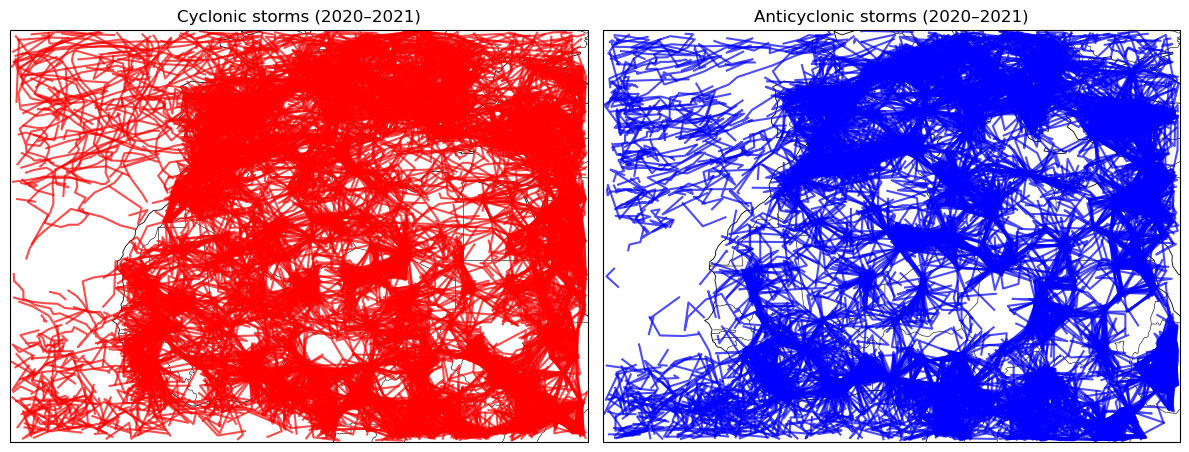

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# ========== Cyclonic ==========
ax1 = axes[0]
ax1.set_extent([-30, 40, 0, 50], crs=ccrs.PlateCarree())
ax1.coastlines(resolution='110m', linewidth=0.6)
ax1.add_feature(cfeature.BORDERS, linewidth=0.4)
ax1.set_title("Cyclonic storms (2020–2021)")

for s in storms:
    if s['type'] == 'cyclonic' and storm_in_domain(s):
        lon = (s['lon'] + 180) % 360 - 180
        ax1.plot(lon, s['lat'], 'r-', transform=ccrs.PlateCarree(), alpha=0.7)

# ========== Anticyclonic ==========
ax2 = axes[1]
ax2.set_extent([-30, 40, 0, 50], crs=ccrs.PlateCarree())
ax2.coastlines(resolution='110m', linewidth=0.6)
ax2.add_feature(cfeature.BORDERS, linewidth=0.4)
ax2.set_title("Anticyclonic storms (2020–2021)")

for s in storms:
    if s['type'] == 'anticyclonic' and storm_in_domain(s):
        lon = (s['lon'] + 180) % 360 - 180
        ax2.plot(lon, s['lat'], 'b-', transform=ccrs.PlateCarree(), alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from datetime import datetime

def storm_in_domain(s):
    in_lat = np.all((s['lat'] > 0) & (s['lat'] < 50))
    in_lon = np.all((s['lon'] > 330) | (s['lon'] < 40))
    times = np.array([
        np.datetime64(datetime(s['year'][i], s['month'][i], s['day'][i], s['hour'][i]))
        for i in range(len(s['lon']))
    ])
    in_time = np.all((times >= np.datetime64("2020-01-01T06:00:00")) & 
                     (times <= np.datetime64("2021-02-28T18:00:00")))
    return in_lat and in_lon and in_time


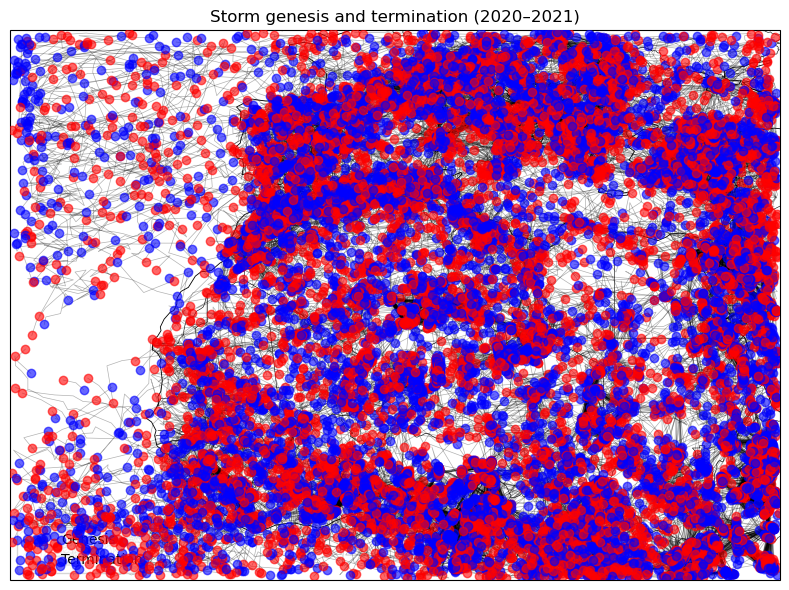

In [53]:


fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-30, 40, 0, 50], crs=ccrs.PlateCarree())
ax.coastlines(resolution='110m', linewidth=0.6)
ax.add_feature(cfeature.BORDERS, linewidth=0.4)
ax.set_title('Storm genesis and termination (2020–2021)')

g, t = False, False 

for s in storms:
    if storm_in_domain(s):

        lon = (s['lon'] + 180) % 360 - 180

        ax.plot(lon[0], s['lat'][0], 'bo', transform=ccrs.PlateCarree(),
                alpha=0.6, label='Genesis' if not g else "", zorder=10)
        g = True

        ax.plot(lon[-1], s['lat'][-1], 'ro', transform=ccrs.PlateCarree(),
                alpha=0.6, label='Termination' if not t else "", zorder=10)
        t = True

        ax.plot(lon, s['lat'], 'k-', transform=ccrs.PlateCarree(), linewidth=0.5, alpha=0.3, zorder=5)


handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='lower left')

plt.tight_layout()
plt.show()


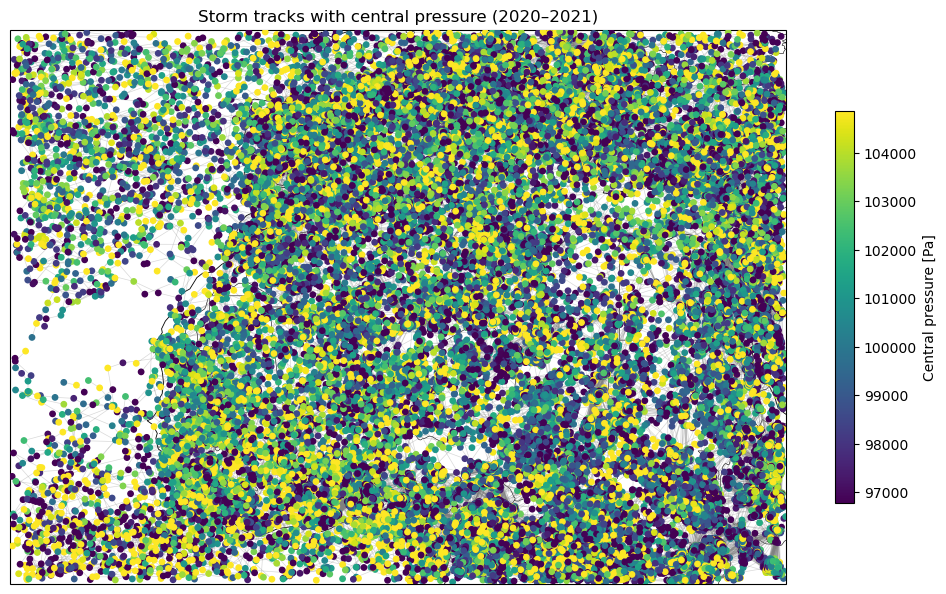

In [52]:
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-30, 40, 0, 50], crs=ccrs.PlateCarree())
ax.coastlines(resolution='110m', linewidth=0.6)
ax.add_feature(cfeature.BORDERS, linewidth=0.4)
ax.set_title('Storm tracks with central pressure (2020–2021)')

all_pressures = []

for s in storms:
    if storm_in_domain(s):
        lon = (s['lon'] + 180) % 360 - 180

        ax.plot(lon, s['lat'], '-', color='gray', linewidth=0.5, alpha=0.3,
                transform=ccrs.PlateCarree())

        sc = ax.scatter(lon, s['lat'], c=s['amp'], cmap='viridis', s=15,
                        transform=ccrs.PlateCarree(), zorder=10)
        all_pressures.extend(s['amp'])

norm = plt.Normalize(min(all_pressures), max(all_pressures))
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', shrink=0.7)
cbar.set_label("Central pressure [Pa]")

plt.tight_layout()
plt.show()

